# SPARK FOUNDATION

Task: Predicting the IRIS data optimum number of clusters and represcenting Visually

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Import important library to perform the data analyzation

In [2]:
df=pd.read_csv("E:\Data Analysis\DATA FILES\Iris.csv")

Importing the data csv format using pandas

In [3]:
df.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

In [4]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Information of data using df.info()

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(150, 6)

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Checking the missing values on each columns using isnull 

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Here Describe show us the min and max width and length of the petals and sepal and also mean and total count in data 

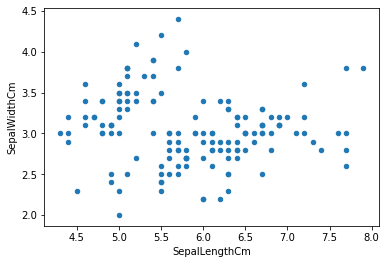

In [10]:
df.plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm")

C:\Users\kssee\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


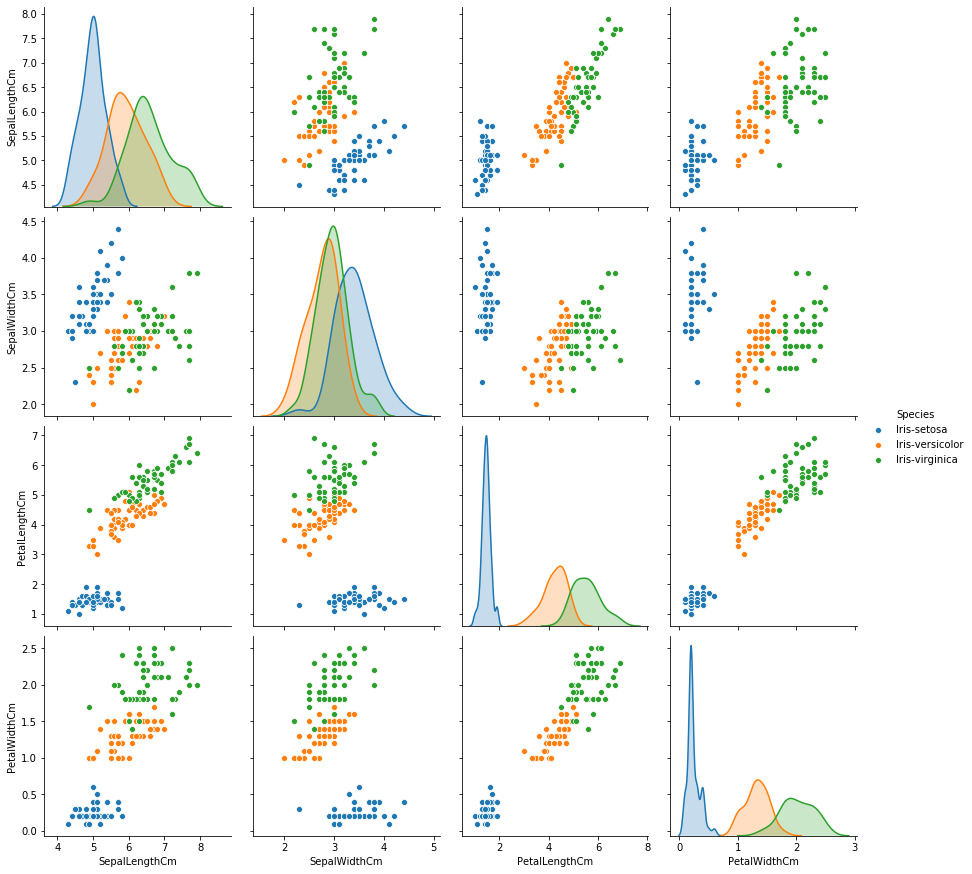

In [11]:
sns.pairplot(df.drop("Id", axis = 1), hue = "Species", size=3)

In [12]:
x=df.iloc[:, [0, 1, 2, 3]].values

In [13]:
model=KMeans(n_clusters=6)
model.fit(x)

KMeans(n_clusters=6)

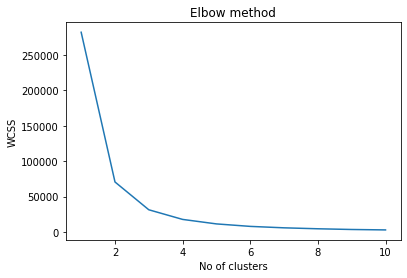

In [14]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

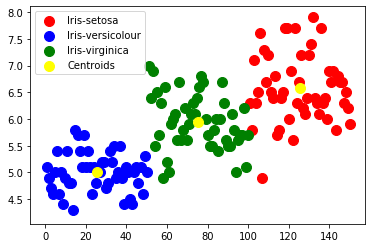

In [16]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Decision Tree

In [17]:
X = df.drop('Species', axis = 1)
y = df['Species']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [19]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

In [20]:
tree = DecisionTreeClassifier()

In [21]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = tree.predict(X_test)

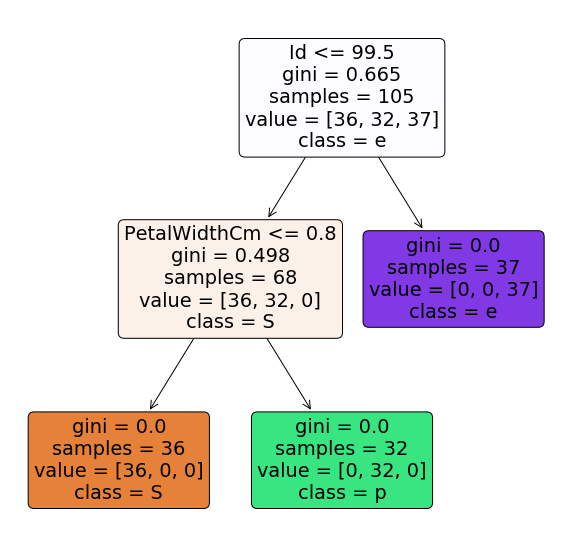

In [23]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (10, 10))
plot_tree(tree, feature_names = X.columns,class_names = 'Species',filled = True,rounded = True)
plt.show()


In [19]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777
